## <U> TEAM 12
#### D22012 - BHARATH BOMMEESHWAR K
#### D22038 - PRIYANKAN DATTA


=========================================================================================================================

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### TASK1:
### Computing using PCA library

##### <U>1. IMPORTING THE DATASET

In [ ]:
data=pd.read_csv('cars.csv')
df = data.copy()
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


##### <U> 2.DROPPING THE CATEGORICAL VARIABLES
    *since numerical variable cannot be dealt with the help of PCA

In [ ]:
df=df.drop(['Car','Origin','Model'],axis=1)

In [ ]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
401,27.0,4,140.0,86,2790,15.6
402,44.0,4,97.0,52,2130,24.6
403,32.0,4,135.0,84,2295,11.6
404,28.0,4,120.0,79,2625,18.6


In [ ]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


##### <u>3.COMPUTING PRINCIPAL COMPONENTS

In [ ]:
from sklearn.decomposition import PCA
pcamodel=PCA()   

In [ ]:
#Fitting the model to the data and tranforming
P = pcamodel.fit_transform(df)
p_pca=pd.DataFrame(data=P,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
p_pca

,pc1,pc2,pc3,pc4,pc5,pc6
0,534.673521,50.066658,11.965243,0.362741,1.646437,0.789927
1,728.628197,78.858148,-6.824807,0.563151,-0.202719,0.191448
2,469.246413,75.246248,-3.218146,-0.205594,1.005903,0.675465
3,464.674346,62.517495,-7.898988,1.905879,0.192586,0.887523
4,479.919431,55.445586,0.790075,1.272833,2.411794,0.881243
...,...,...,...,...,...,...
401,-195.029215,-34.046349,-1.562250,-1.802466,1.331956,-0.658597
402,-856.550188,-5.732416,17.409465,-13.616718,-6.618425,0.124619
403,-687.023340,20.943361,-1.242661,-4.050352,4.114588,-0.535740
404,-361.388082,-35.091035,-1.390137,-1.509002,-1.389969,-0.324481


##### <u>4.PROPORTION OF VARIANCE EXPLAINED BY EACH PRINCIPAL COMPONENT 

In [ ]:
#Components of PCA which is the eigen vectors
pca_comp = pcamodel.components_
pca_comp

array([[-7.75900382e-03,  1.79971631e-03,  1.14896221e-01,
         4.00111543e-02,  9.92538414e-01, -1.42216691e-03],
       [-2.00378446e-02,  1.35366163e-02,  9.35613529e-01,
         3.28549571e-01, -1.21783252e-01, -3.55891548e-02],
       [ 3.71740490e-02,  6.68943936e-03,  3.33041850e-01,
        -9.40533755e-01, -2.80531625e-04,  5.52507454e-02],
       [-9.99027549e-01,  3.11091096e-03, -7.45639238e-03,
        -4.24971866e-02, -5.24870118e-03, -6.71722044e-03],
       [ 9.53573098e-03,  8.29854838e-03, -1.51697521e-02,
        -6.35501105e-02,  2.94769955e-03, -9.97778922e-01],
       [ 3.06576298e-03,  9.99845102e-01, -1.49529183e-02,
         2.43214066e-03, -1.44033514e-04,  8.41703683e-03]])

In [ ]:
#Variance explained by each P-Component
pcamodel.explained_variance_ratio_

array([9.97359165e-01, 2.12260590e-03, 4.78047266e-04, 3.51907466e-05,
       4.61720051e-06, 3.73618387e-07])

Text(0, 0.5, 'CUMULATIVE EXPLAINED VARIANCE')

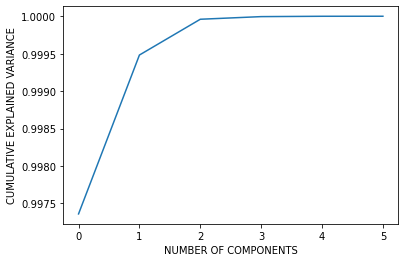

In [ ]:
# Screen plot showing the cumulative variance explained by the PC's
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pcamodel.explained_variance_ratio_))
plt.xlabel("NUMBER OF COMPONENTS")
plt.ylabel("CUMULATIVE EXPLAINED VARIANCE")

In [ ]:
Var_lib={"PC1":pcamodel.explained_variance_ratio_[0],
        "PC2":pcamodel.explained_variance_ratio_[1:2],
        "PC3":pcamodel.explained_variance_ratio_[2:3],
        "PC4":pcamodel.explained_variance_ratio_[3:4],
        "PC5":pcamodel.explained_variance_ratio_[4:5],
        "PC6":pcamodel.explained_variance_ratio_[5:6]}
Var_lib=pd.DataFrame(Var_lib,index=["Variation explained by each component"])
Var_lib

,PC1,PC2,PC3,PC4,PC5,PC6
Variation explained by each component,0.997359,0.002123,0.000478,0.000035,0.000005,3.736184e-07



<div class = "alert alert-box alert-success">
<b>
<u>THE FIRST PCA COMPONENTS ALONE CAN EXPLAIN 99.7% OF THE OVERALL VARIANCE IN THE DATA
</b>

<b> <font color=black>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   

### TASK2:
### Computing PCA without Library

##### <U>3.COVARIANCE MATRIX

##### Calculating the Variance.Covariance Matrix of original data   

In [ ]:
cov_mat=df.cov()
cov_mat

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
MPG,70.589863,-10.581204,-673.737074,-247.391641,-5604.189894,9.998099
Cylinders,-10.581204,2.931491,170.982829,57.130359,1298.254662,-2.507662
Displacement,-673.737074,170.982829,11008.722272,3714.807149,82868.813665,-164.122683
Horsepower,-247.391641,57.130359,3714.807149,1641.923816,28857.607493,-77.476386
Weight,-5604.189894,1298.254662,82868.813665,28857.607493,717416.332056,-1021.220272
Acceleration,9.998099,-2.507662,-164.122683,-77.476386,-1021.220272,7.858821


##### <u>4.EIGEN VALUE DECOMPOSITION

##### Finding the Eigen vector ,Eigen value pair of the Var.Cov matrix

##### Eigen Value

In [ ]:
eig_val,A=np.linalg.eig(cov_mat)  #A is the Eigen vectors

In [ ]:
#Eigen values in Increasing order
eig_val

array([7.28220157e+05, 1.54981721e+03, 3.49045426e+02, 2.56944659e+01,
       3.37124137e+00, 2.72796852e-01])

###### Eigen vectors ( Loading matrix)

In [ ]:
A #Eigen vector in the Increasing order of eigen values 

array([[ 7.75900382e-03, -2.00378446e-02, -3.71740490e-02,
         9.99027549e-01, -9.53573098e-03,  3.06576298e-03],
       [-1.79971631e-03,  1.35366163e-02, -6.68943936e-03,
        -3.11091096e-03, -8.29854838e-03,  9.99845102e-01],
       [-1.14896221e-01,  9.35613529e-01, -3.33041850e-01,
         7.45639238e-03,  1.51697521e-02, -1.49529183e-02],
       [-4.00111543e-02,  3.28549571e-01,  9.40533755e-01,
         4.24971866e-02,  6.35501105e-02,  2.43214066e-03],
       [-9.92538414e-01, -1.21783252e-01,  2.80531625e-04,
         5.24870118e-03, -2.94769955e-03, -1.44033514e-04],
       [ 1.42216691e-03, -3.55891548e-02, -5.52507454e-02,
         6.71722044e-03,  9.97778922e-01,  8.41703683e-03]])

The Eigen Vector with the maximum Eigen value is the LOADING for the First Principal Component,
    Second max goes to the Second Principal Component,and goes on...

##### <U>5.CALCULATING PRINCIPAL COMPONENTS

In [ ]:
# Dot product of corresponding Eigen vector with the corrsponding variables 
# We have 6Variables which intends to get 6PC's since Number of Observations > Number of Features.
pc1_arr=df@A[:,0]
pc2_arr=df@A[:,1]
pc3_arr=df@A[:,2]
pc4_arr=df@A[:,3]
pc5_arr=df@A[:,4]
pc6_arr=df@A[:,5]

p_cmpts = pd.DataFrame({"pc1":pc1_arr,"pc2":pc2_arr,"pc3":pc3_arr,"pc4":pc4_arr,"pc5":pc5_arr,"pc6":pc6_arr})
p_cmpts

,pc1,pc2,pc3,pc4,pc5,pc6
0,-3518.186860,-97.463175,19.622866,44.243411,14.325205,3.375888
1,-3712.141537,-68.671684,38.412916,44.043001,16.174360,2.777409
2,-3452.759752,-72.283584,34.806255,44.811746,14.965739,3.261426
3,-3448.187686,-85.012337,39.487097,42.700273,15.779056,3.473484
4,-3463.432770,-92.084246,30.798033,43.333319,13.559848,3.467204
...,...,...,...,...,...,...
401,-2788.484124,-181.576181,33.150358,46.408618,14.639685,1.927364
402,-2126.963152,-153.262248,14.178644,58.222869,22.590067,2.710580
403,-2296.489999,-126.586471,32.830770,48.656504,11.857053,2.050221
404,-2622.125258,-182.620868,32.978245,46.115153,17.361611,2.261480


##### <u>6. CALCULATING THE PROPORTION OF VARIANCE EXPLAINED BY EACH PRINCIPAL COMPONENT 

In [ ]:
#Variance explained by each Pc
pc = [pc1_arr,pc2_arr,pc3_arr,pc4_arr,pc5_arr,pc6_arr]
var_pc = []
for i in pc:
    var_pc.append(np.var(i))
print("Variance Explained by each Principal Component :",var_pc)

Variance Explained by each Principal Component : [726426.511469821, 1545.999926906797, 348.1857084097418, 25.63117900276393, 3.36293782367855, 0.27212493854736153]


In [ ]:
#Proportion of Variance explained by each Pc
total_var = sum(var_pc)
var_prop = []
for i in pc:
    var_prop.append((np.var(i))/(total_var))
var_prop_ratio = np.array(var_prop)   
var_prop_ratio

array([9.97359165e-01, 2.12260590e-03, 4.78047266e-04, 3.51907466e-05,
       4.61720051e-06, 3.73618387e-07])

Text(0, 0.5, 'CUMULATIVE EXPLAINED VARIANCE')

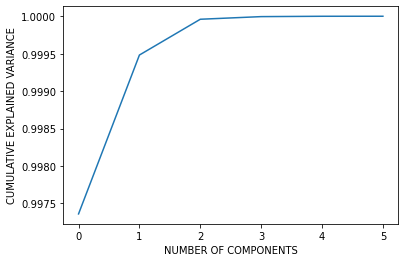

In [ ]:
# Screen plot showing the cumulative variance explained by the PC's
import matplotlib.pyplot as plt

plt.plot(np.cumsum(var_prop_ratio))
plt.xlabel("NUMBER OF COMPONENTS")
plt.ylabel("CUMULATIVE EXPLAINED VARIANCE")

In [ ]:
Var={"PC1":var_prop_ratio[0],
        "PC2":var_prop_ratio[1:2],
        "PC3":var_prop_ratio[2:3],
        "PC4":var_prop_ratio[3:4],
        "PC5":var_prop_ratio[4:5],
        "PC6":var_prop_ratio[5:6]}
Var=pd.DataFrame(Var,index=["Variation_Proportions calculated Without PCA Library"])
Var

,PC1,PC2,PC3,PC4,PC5,PC6
Variation_Proportions calculated Without PCA Library,0.997359,0.002123,0.000478,0.000035,0.000005,3.736184e-07



<div class = "alert alert-box alert-success">
<b>
<u>THE FIRST PCA COMPONENTS CAN EXPLAIN ABOUT 99.7% OF THE OVERALL VARIANCE IN THE DATA
</b>

<b> <font color=black>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   

### TASK 3

### Verifying the results

##### <U><b> <font color=Blue><u> Result 1

In [ ]:
cov_mat

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
MPG,70.589863,-10.581204,-673.737074,-247.391641,-5604.189894,9.998099
Cylinders,-10.581204,2.931491,170.982829,57.130359,1298.254662,-2.507662
Displacement,-673.737074,170.982829,11008.722272,3714.807149,82868.813665,-164.122683
Horsepower,-247.391641,57.130359,3714.807149,1641.923816,28857.607493,-77.476386
Weight,-5604.189894,1298.254662,82868.813665,28857.607493,717416.332056,-1021.220272
Acceleration,9.998099,-2.507662,-164.122683,-77.476386,-1021.220272,7.858821


In [ ]:
#Eigen vector from Var.Covariance matrix
A

array([[ 7.75900382e-03, -2.00378446e-02, -3.71740490e-02,
         9.99027549e-01, -9.53573098e-03,  3.06576298e-03],
       [-1.79971631e-03,  1.35366163e-02, -6.68943936e-03,
        -3.11091096e-03, -8.29854838e-03,  9.99845102e-01],
       [-1.14896221e-01,  9.35613529e-01, -3.33041850e-01,
         7.45639238e-03,  1.51697521e-02, -1.49529183e-02],
       [-4.00111543e-02,  3.28549571e-01,  9.40533755e-01,
         4.24971866e-02,  6.35501105e-02,  2.43214066e-03],
       [-9.92538414e-01, -1.21783252e-01,  2.80531625e-04,
         5.24870118e-03, -2.94769955e-03, -1.44033514e-04],
       [ 1.42216691e-03, -3.55891548e-02, -5.52507454e-02,
         6.71722044e-03,  9.97778922e-01,  8.41703683e-03]])

In [ ]:
pcamodel.components_

array([[-7.75900382e-03,  1.79971631e-03,  1.14896221e-01,
         4.00111543e-02,  9.92538414e-01, -1.42216691e-03],
       [-2.00378446e-02,  1.35366163e-02,  9.35613529e-01,
         3.28549571e-01, -1.21783252e-01, -3.55891548e-02],
       [ 3.71740490e-02,  6.68943936e-03,  3.33041850e-01,
        -9.40533755e-01, -2.80531625e-04,  5.52507454e-02],
       [-9.99027549e-01,  3.11091096e-03, -7.45639238e-03,
        -4.24971866e-02, -5.24870118e-03, -6.71722044e-03],
       [ 9.53573098e-03,  8.29854838e-03, -1.51697521e-02,
        -6.35501105e-02,  2.94769955e-03, -9.97778922e-01],
       [ 3.06576298e-03,  9.99845102e-01, -1.49529183e-02,
         2.43214066e-03, -1.44033514e-04,  8.41703683e-03]])

#### Hence Eigen vectors calculated from Var.Covariance Matrix matches the PCA_components

##### <U><b> <font color=Blue> Result 2

##### Comparing the Variance of Principal components with Eigen values

In [ ]:
pd.DataFrame({"Eigen value":eig_val,"Variance_PCA":pcamodel.explained_variance_})

,Eigen value,Variance_PCA
0,728220.157177,728220.157177
1,1549.817211,1549.817211
2,349.045426,349.045426
3,25.694466,25.694466
4,3.371241,3.371241
5,0.272797,0.272797


#####  <U><b> <font color=Blue><u> Result 3

##### The diagonal element of VAR.COVARIANCE matrix is same as the Eigen values which is the Variance of the corrsponding variables



In [ ]:
#The diagonal element represent the variance of the corresponsing Variable
cov_mat

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
MPG,70.589863,-10.581204,-673.737074,-247.391641,-5604.189894,9.998099
Cylinders,-10.581204,2.931491,170.982829,57.130359,1298.254662,-2.507662
Displacement,-673.737074,170.982829,11008.722272,3714.807149,82868.813665,-164.122683
Horsepower,-247.391641,57.130359,3714.807149,1641.923816,28857.607493,-77.476386
Weight,-5604.189894,1298.254662,82868.813665,28857.607493,717416.332056,-1021.220272
Acceleration,9.998099,-2.507662,-164.122683,-77.476386,-1021.220272,7.858821


In [ ]:
#cross verify variance from var.cov matrix
col = ["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration"]
pd.DataFrame({"MPG":np.var(df.MPG),"Cylinders":np.var(df.Cylinders),"Acceleration":np.var(df.Acceleration),"Displacement":np.var(df.Displacement),"Horsepower":np.var(df.Horsepower),"Weight":np.var(df.Weight)},columns = col,index = ["Variance"])

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
Variance,70.415996,2.92427,10981.607193,1637.879668,715649.296756,7.839464


In [ ]:
#Sum of all diagnol element in var.cov matrix
tot_var = 0
for i in range(len(cov_mat)):
    tot_var += cov_mat.iloc[i][i]
tot_var    

730148.3583181291

In [ ]:
#sum of all eigen values
pd.DataFrame(eig_val)
np.sum(eig_val)

730148.3583181293

<b> <font color=black>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   

### TASK 4

##### (i) Fitting Linear regression model assigning MPG as target variable(using Original data & Principal component data).
##### (ii) Use Linear model to predict MPG only using Principal components explaining maximum variance
##### Check R2 and MAE

#### <U><b> <font color=Blue> USING ORIGINAL DATA

In [ ]:
# Specifying Independent and Target Variable
X = df.drop("MPG",axis=1)
y = df["MPG"]

In [ ]:
#Fitting the linear model to the dataset 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

44.121813688477175

In [ ]:
#the regressors/coefficient of each predictor variable which determines the prediction
reg.coef_

array([-0.28629915, -0.00263001, -0.03586575, -0.00545706,  0.06322875])

In [ ]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
org_r2 = reg.score(X,y)
org_r2

0.6359097936715497

##### <U> MODEL VALIDATION

#### Train data (Insample)

In [ ]:
reg_pred = reg.predict(X)
#reg_pred

##### Evaluating the model

In [ ]:
#MAE (mean absolute error)
org_mae = np.mean(np.abs(y-reg_pred))
org_mae

3.5628930955538847

#### <U> <U><b> <font color=Blue>USING PRINCIPAL COMPONENTS DATA

In [ ]:
#Transforming Independent variables using PCA
p_data = pcamodel.fit_transform(X)
d1 = pd.DataFrame(p_data)
d1

,0,1,2,3,4
0,534.650408,50.061188,11.959719,1.649856,0.790591
1,728.587633,78.824799,-6.815002,-0.196918,0.193360
2,469.221319,75.232594,-3.239117,1.004320,0.674693
3,464.633600,62.459566,-7.835406,0.211310,0.893446
4,479.886907,55.410386,0.824787,2.424154,0.884612
...,...,...,...,...,...
401,-195.004436,-34.004763,-1.621716,1.314495,-0.664462
402,-856.413422,-5.443768,16.894528,-6.748477,0.084306
403,-686.974592,21.019572,-1.397834,4.075715,-0.549113
404,-361.360550,-35.055498,-1.437710,-1.404443,-0.328797


In [ ]:
#Fitting the linear model to the dataset 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(d1,y)

LinearRegression()

In [ ]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

23.051231527093595

In [ ]:
#the regressors/coefficient of each predictor variable which determines the prediction
reg.coef_

array([-0.00775895, -0.01970334,  0.03447772, -0.06321687, -0.28575273])

In [ ]:
#Rsquare value using the Transformed variables
pc_r2 = reg.score(d1,y)
pc_r2

0.6359097936715497

##### <U> MODEL VALIDATION

#### Train data (Insample)

In [ ]:
reg_pred = reg.predict(d1)
#reg_pred

##### Evaluating the model

In [ ]:
#MAE (mean absolute error)
pc_mae = np.mean(np.abs(y-reg_pred))
pc_mae

3.562893095553886

#### <U> <U><b> <font color=Blue>USING PRINCIPAL COMPONENTS WITH >=95% VARIANCE EXPLAINED

In [ ]:
#The principal component is calculated without the variable MPG here
d1.head()

,0,1,2,3,4
0,534.650408,50.061188,11.959719,1.649856,0.790591
1,728.587633,78.824799,-6.815002,-0.196918,0.193360
2,469.221319,75.232594,-3.239117,1.004320,0.674693
3,464.633600,62.459566,-7.835406,0.211310,0.893446
4,479.886907,55.410386,0.824787,2.424154,0.884612


In [ ]:
#Variance explained by each Pricipal component
var_pc = []
for i in range(5):
    var_pc.append(np.var(d1[i]))
print("Variance Explained by each Principal Component :",var_pc)

Variance Explained by each Principal Component : [726382.7806456282, 1545.3896652233345, 347.73971010306485, 3.3649663819889857, 0.27236354379349764]


In [ ]:
#Proportion of Variance explained by each Principal component
total_var = np.sum(var_pc)
var_prop = []
for i in d1:
    var_prop.append((np.var(d1[i]))/(total_var))
var_prop_ratio = np.array(var_prop)   
var_prop_ratio

array([9.97395551e-01, 2.12197318e-03, 4.77481087e-04, 4.62043235e-06,
       3.73982140e-07])

In [ ]:
Var={"PC1":var_prop_ratio[0],
        "PC2":var_prop_ratio[1:2],
        "PC3":var_prop_ratio[2:3],
        "PC4":var_prop_ratio[3:4],
        "PC5":var_prop_ratio[4:5]}
Var=pd.DataFrame(Var,index=["Variance_Proportions"])
Var

,PC1,PC2,PC3,PC4,PC5
Variance_Proportions,0.997396,0.002122,0.000477,0.000005,3.739821e-07


##### lets choose only the first principal component

In [ ]:
# Specifying Independent and Target Variable
X = pd.DataFrame(d1[0])
y = df["MPG"]

In [ ]:
#Fitting the linear model to the dataset 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

23.051231527093595

In [ ]:
#the regressors/coefficient of each predictor variable which determines the prediction
reg.coef_

array([-0.00775895])

In [ ]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
final_pc_r2 = reg.score(X,y)
final_pc_r2

0.6210125544096614

##### <U> MODEL VALIDATION

#### Train data (Insample)

In [ ]:
reg_pred = reg.predict(X)
#reg_pred

##### Evaluating the model

In [ ]:
#MAE (mean absolute error)
final_pc_mae = np.mean(np.abs(y-reg_pred))
final_pc_mae

3.6117269404096497

#### <b> <font color=GREEN> <U>RESULTS OF EXPERIMENT ( WITH LINEAR REGRESSION )

In [ ]:
result = pd.DataFrame({"R-Square":[org_r2,pc_r2,final_pc_r2],"MAE":[org_mae,pc_mae,final_pc_mae]},index=["Using Original data","Using all Principal Components","Using Principal Components which explains >95% variance"])
result

,R-Square,MAE
Using Original data,0.635910,3.562893
Using all Principal Components,0.635910,3.562893
Using Principal Components which explains >95% variance,0.621013,3.611727


<b> <font color=black>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   

### TASK 5

##### Image compression using PCA


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import stats
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler

In [ ]:
#pip install opencv-python
import cv2

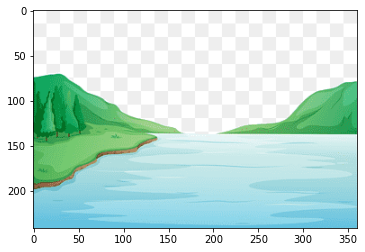

In [ ]:
#Reading the image file using function(imread) from matplot library
img = cv2.cvtColor(cv2.imread('paint.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img.shape
#432 rows ,768 columns,3layers (rows(n)<columns(p))

(242, 360, 3)

In [ ]:
#Splitting into 3 matrix/channels of red,green and blue
blue,green,red = cv2.split(img)

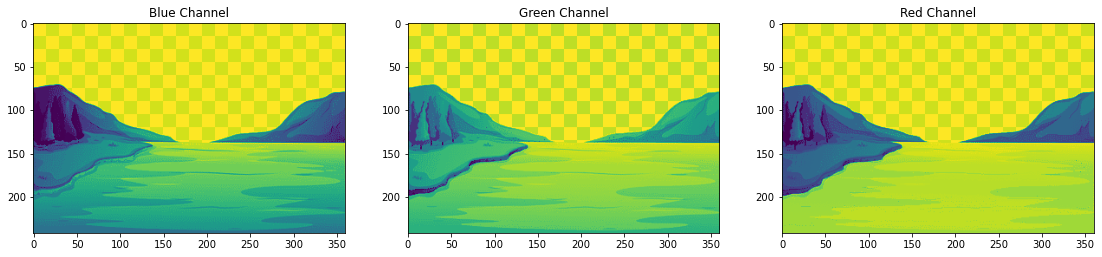

In [ ]:
# Plotting the red,blue,green images
fig = plt.figure(figsize = (19, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [ ]:
#Matrix of Blue layer (dividing the cell by total numbers to bring down the values under similar magnitude)
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df = blue_temp_df/255
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.458824,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,...,0.388235,0.388235,0.458824,0.388235,0.388235,0.388235,0.458824,0.388235,0.388235,0.388235
238,0.458824,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,...,0.458824,0.388235,0.388235,0.458824,0.388235,0.458824,0.388235,0.388235,0.458824,0.458824
239,0.458824,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,...,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235
240,0.458824,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,...,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235,0.388235


In [ ]:
#matrix of green layer
green_temp_df = pd.DataFrame(data = green)
green_temp_df = green_temp_df/255
green_temp_df

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.784314,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,...,0.760784,0.760784,0.784314,0.760784,0.760784,0.760784,0.784314,0.760784,0.760784,0.760784
238,0.784314,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,...,0.784314,0.760784,0.760784,0.784314,0.760784,0.784314,0.760784,0.760784,0.784314,0.784314
239,0.784314,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,...,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784
240,0.784314,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,...,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784


In [ ]:
#matrix of red layer
red_temp_df = pd.DataFrame(data = red)
red_temp_df = red_temp_df/255
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,...,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431
238,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,...,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431
239,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,...,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431
240,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,...,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431


#### <U> Choosing different number of principal components

In [ ]:
components = [5,15,20,35,50]
blue = []
green = []
red = []
for i in components:
    pca_b = PCA(n_components=i)
    trans_pca_b = pca_b.fit_transform(blue_temp_df)
    blue.append(sum(pca_b.explained_variance_ratio_))
    
    pca_g = PCA(n_components=i)
    trans_pca_g = pca_g.fit_transform(green_temp_df)
    green.append(sum(pca_g.explained_variance_ratio_))

    pca_r = PCA(n_components=i)
    trans_pca_r = pca_r.fit_transform(red_temp_df)
    red.append(sum(pca_r.explained_variance_ratio_))
    
exp =pd.DataFrame({"Blue Channel":blue,
                   "Green Channel":green,
                   "Red Channel":red},index=["5PC","15PC","20PC","35PC","50PC"])
exp  
#variance explained by first consecutive different group of Principal Components

,Blue Channel,Green Channel,Red Channel
5PC,0.933230,0.858830,0.906161
15PC,0.976033,0.948464,0.967809
20PC,0.981489,0.962347,0.977153
35PC,0.989910,0.980877,0.989435
50PC,0.993682,0.988834,0.994270


#### <U>PRINCIPAL COMPONENTS ARE SORTED IN THE INCREASING ORDER OF VARIANCE EXPLAINED
#### FIRST 5 PRINCIPAL COMPONENTS

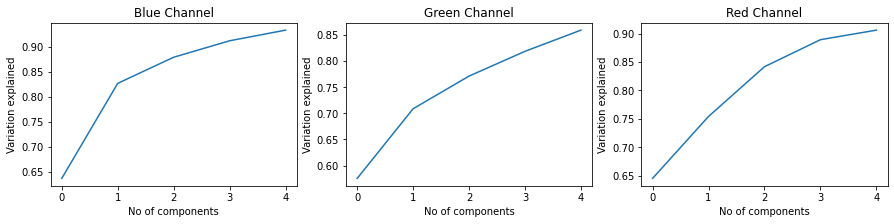

In [ ]:
pca_b = PCA(n_components=5)
trans_pca_b = pca_b.fit_transform(blue_temp_df)
pca_g = PCA(n_components=5)
trans_pca_g = pca_g.fit_transform(green_temp_df)
pca_r = PCA(n_components=5)
trans_pca_r = pca_r.fit_transform(red_temp_df)

#Graph showing Cumulative Explained variation of 20Principalcomponent
#BLUE 
fig = plt.figure(figsize = (15, 3)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_b.explained_variance_ratio_))

#GREEN
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_g.explained_variance_ratio_))

#RED
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.show()

In [ ]:
pca_b

PCA(n_components=5)

In [ ]:
#transforming the chosen Principal components to Original shape of the matrix (Multiply P* with (A*).Transpose)
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(242, 360) (242, 360) (242, 360)


In [ ]:
#merging 3 layers 
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(242, 360, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


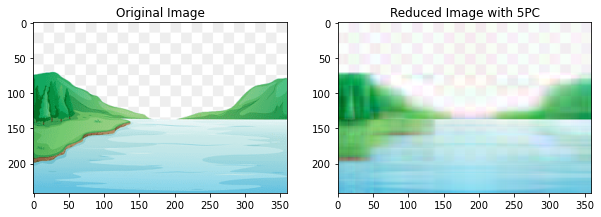

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image with 5PC")
plt.imshow(img_reduced)



#### FIRST 15 PRINCIPAL COMPONENTS

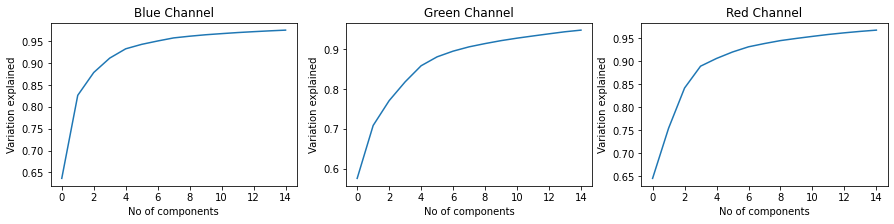

In [ ]:
pca_b = PCA(n_components=15)
trans_pca_b = pca_b.fit_transform(blue_temp_df)
pca_g = PCA(n_components=15)
trans_pca_g = pca_g.fit_transform(green_temp_df)
pca_r = PCA(n_components=15)
trans_pca_r = pca_r.fit_transform(red_temp_df)

#Graph showing Cumulative Explained variation of 20Principalcomponent
#BLUE 
fig = plt.figure(figsize = (15, 3)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_b.explained_variance_ratio_))

#GREEN
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_g.explained_variance_ratio_))

#RED
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.show()

In [ ]:
pca_b

PCA(n_components=15)

In [ ]:
#transforming the chosen Principal components to Original shape of the matrix (Multiply P* with (A*).Transpose)
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(242, 360) (242, 360) (242, 360)


In [ ]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(242, 360, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


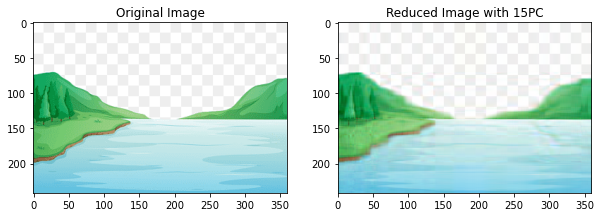

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image with 15PC")
plt.imshow(img_reduced)


#### FIRST 20 PRINCIPAL COMPONENTS

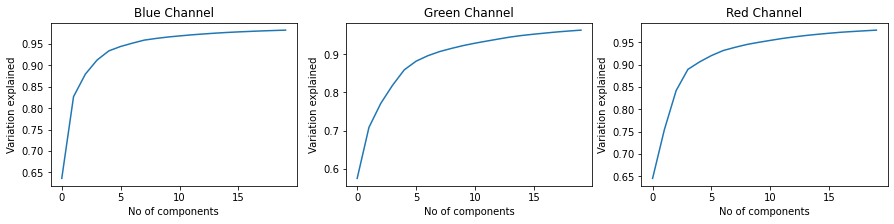

In [ ]:
pca_b = PCA(n_components=20)
trans_pca_b = pca_b.fit_transform(blue_temp_df)
pca_g = PCA(n_components=20)
trans_pca_g = pca_g.fit_transform(green_temp_df)
pca_r = PCA(n_components=20)
trans_pca_r = pca_r.fit_transform(red_temp_df)

#Graph showing Cumulative Explained variation of 20Principalcomponent
#BLUE 
fig = plt.figure(figsize = (15, 3)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_b.explained_variance_ratio_))

#GREEN
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_g.explained_variance_ratio_))

#RED
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.show()

In [ ]:
pca_b

PCA(n_components=20)

In [ ]:
#transforming the chosen Principal components to Original shape of the matrix (Multiply P* with (A*).Transpose)
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(242, 360) (242, 360) (242, 360)


In [ ]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(242, 360, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


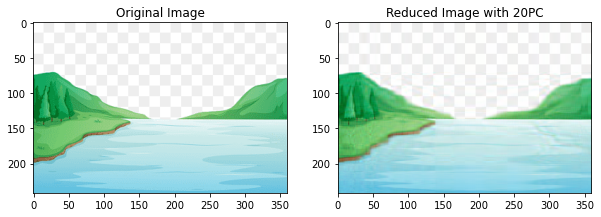

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image with 20PC")
plt.imshow(img_reduced)



#### FIRST 35 PRINCIPAL COMPONENTS

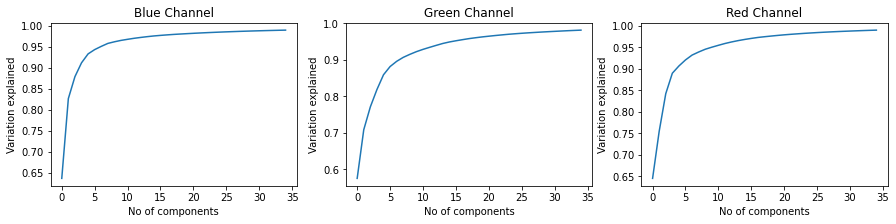

In [ ]:
pca_b = PCA(n_components=35)
trans_pca_b = pca_b.fit_transform(blue_temp_df)
pca_g = PCA(n_components=35)
trans_pca_g = pca_g.fit_transform(green_temp_df)
pca_r = PCA(n_components=35)
trans_pca_r = pca_r.fit_transform(red_temp_df)

#Graph showing Cumulative Explained variation of 50Principalcomponent
#BLUE 
fig = plt.figure(figsize = (15, 3)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_b.explained_variance_ratio_))

#GREEN
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_g.explained_variance_ratio_))

#RED
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.show()

In [ ]:
pca_b

PCA(n_components=35)

In [ ]:
#transforming the chosen Principal components to Original shape of the matrix (Multiply P* with (A*).Transpose)
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(242, 360) (242, 360) (242, 360)


In [ ]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(242, 360, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


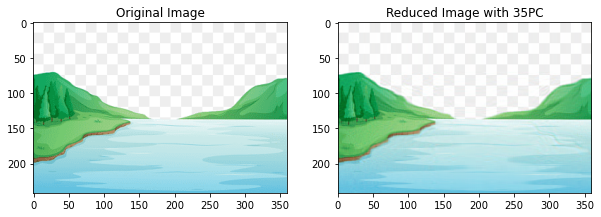

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image with 35PC")
plt.imshow(img_reduced)



#### FIRST 50 PRINCIPAL COMPONENTS

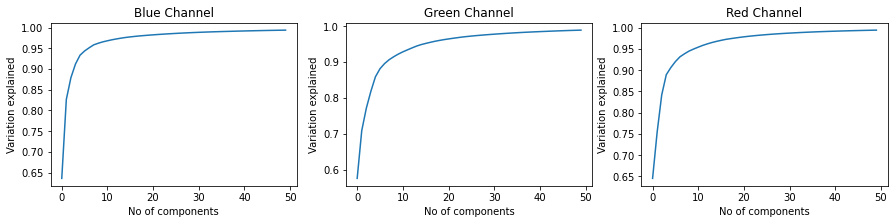

In [ ]:
pca_b = PCA(n_components=50)
trans_pca_b = pca_b.fit_transform(blue_temp_df)
pca_g = PCA(n_components=50)
trans_pca_g = pca_g.fit_transform(green_temp_df)
pca_r = PCA(n_components=50)
trans_pca_r = pca_r.fit_transform(red_temp_df)

#Graph showing Cumulative Explained variation of 20Principalcomponent
#BLUE 
fig = plt.figure(figsize = (15, 3)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_b.explained_variance_ratio_))

#GREEN
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_g.explained_variance_ratio_))

#RED
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('No of components')
plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.show()

In [ ]:
pca_b

PCA(n_components=50)

In [ ]:
#transforming the chosen Principal components to Original shape of the matrix (Multiply P* with (A*).Transpose)
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(242, 360) (242, 360) (242, 360)


In [ ]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(242, 360, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


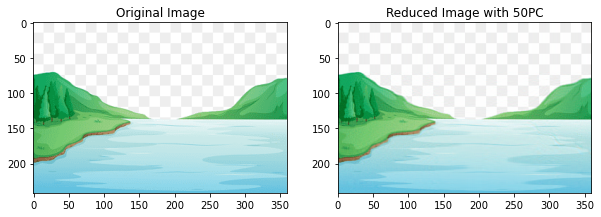

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image with 50PC")
plt.imshow(img_reduced)
